In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter
plt.style.use('fivethirtyeight')

In [2]:
data=pd.read_csv('airbnb.csv')
data=pd.DataFrame(data)

In [3]:
data.head()

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
0,10176931,1476,49180562,Shared room,NaN,Amsterdam,NaN,De Pijp / Rivierenbuurt,7,4.5,2,1.0,NaN,156.0,NaN,Red Light/ Canal view apartment (Shared),2017-07-23 13:06:27.391699,52.356209,4.887491,0101000020E610000033FAD170CA8C13403BC5AA41982D...
1,8935871,1476,46718394,Shared room,NaN,Amsterdam,NaN,Centrum West,45,4.5,4,1.0,NaN,126.0,NaN,Sunny and Cozy Living room in quite neighbours,2017-07-23 13:06:23.607187,52.378518,4.896120,0101000020E6100000842A357BA095134042791F477330...
2,14011697,1476,10346595,Shared room,NaN,Amsterdam,NaN,Watergraafsmeer,1,0.0,3,1.0,NaN,132.0,NaN,Amsterdam,2017-07-23 13:06:23.603546,52.338811,4.943592,0101000020E6100000A51133FB3CC613403543AA285E2B...
3,6137978,1476,8685430,Shared room,NaN,Amsterdam,NaN,Centrum West,7,5.0,4,1.0,NaN,121.0,NaN,Canal boat RIDE in Amsterdam,2017-07-23 13:06:22.689787,52.376319,4.890028,0101000020E6100000DF180280638F134085EE92382B30...
4,18630616,1476,70191803,Shared room,NaN,Amsterdam,NaN,De Baarsjes / Oud West,1,0.0,2,1.0,NaN,93.0,NaN,One room for rent in a three room appartment,2017-07-23 13:06:19.681469,52.370384,4.852873,0101000020E6100000CD902A8A57691340187B2FBE682F...


In [4]:
#checking for null values

In [5]:
data.isnull().sum()

room_id                     0
survey_id                   0
host_id                     0
room_type                   0
country                 18723
city                        0
borough                 18723
neighborhood                0
reviews                     0
overall_satisfaction        0
accommodates                0
bedrooms                    0
bathrooms               18723
price                       0
minstay                 18723
name                       52
last_modified               0
latitude                    0
longitude                   0
location                    0
dtype: int64

In [6]:
#droppibg irrelevant columns for different reasons

In [7]:
data.drop(['accommodates','borough','survey_id','minstay','country','bathrooms'],axis=1,inplace=True)

In [8]:
data['price'].describe()

count    18723.000000
mean       166.599477
std        108.943849
min         12.000000
25%        108.000000
50%        144.000000
75%        192.000000
max       6000.000000
Name: price, dtype: float64

In [9]:
data['bedrooms'].value_counts()

1.0     11101
2.0      4456
3.0      1444
0.0      1154
4.0       473
5.0        62
6.0        19
10.0        5
7.0         4
8.0         3
9.0         2
Name: bedrooms, dtype: int64

In [10]:
#dropping rows with no bedroom

In [11]:
fff=data[data['bedrooms']==0].index
data.drop(fff,inplace=True)

In [12]:
data['bedrooms'].value_counts()

1.0     11101
2.0      4456
3.0      1444
4.0       473
5.0        62
6.0        19
10.0        5
7.0         4
8.0         3
9.0         2
Name: bedrooms, dtype: int64

In [13]:
# taking a look at the overall satisfaction column

In [14]:
data['overall_satisfaction'].value_counts()

5.0    7277
0.0    5406
4.5    4242
4.0     527
3.5      99
3.0      15
1.5       1
2.5       1
1.0       1
Name: overall_satisfaction, dtype: int64

In [15]:
data['overall_satisfaction'].describe()

count    17569.000000
mean         3.300046
std          2.216163
min          0.000000
25%          0.000000
50%          4.500000
75%          5.000000
max          5.000000
Name: overall_satisfaction, dtype: float64

In [16]:
#replacing zero value with average value

In [17]:
data['overall_satisfaction'].replace(0,4.5,inplace=True)
data['overall_satisfaction'].value_counts()

4.5    9648
5.0    7277
4.0     527
3.5      99
3.0      15
1.5       1
2.5       1
1.0       1
Name: overall_satisfaction, dtype: int64

In [18]:
data['room_type'].value_counts()

Entire home/apt    14126
Private room        3380
Shared room           63
Name: room_type, dtype: int64

In [19]:
#comparing average prices of each room_type

In [20]:
df1=pd.pivot_table(data,index='room_type',values='price',aggfunc='mean')
df1

,price
room_type,
Entire home/apt,184.361886
Private room,105.509172
Shared room,103.682540


array([<AxesSubplot:ylabel='price'>], dtype=object)

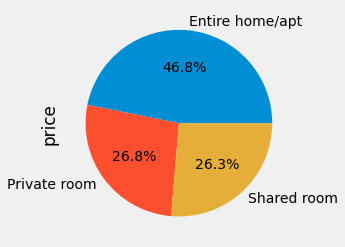

In [21]:
df1.plot(kind='pie',legend=None,subplots=True,autopct='%1.1f%%')

In [22]:
data['room_type'].value_counts()

Entire home/apt    14126
Private room        3380
Shared room           63
Name: room_type, dtype: int64

In [23]:
data.columns

Index(['room_id', 'host_id', 'room_type', 'city', 'neighborhood', 'reviews',
       'overall_satisfaction', 'bedrooms', 'price', 'name', 'last_modified',
       'latitude', 'longitude', 'location'],
      dtype='object')

In [24]:
#total number of neighborhoods

In [25]:
data['neighborhood'].value_counts()

De Baarsjes / Oud West                    3160
De Pijp / Rivierenbuurt                   2235
Centrum West                              1976
Centrum Oost                              1593
Noord-West / Noord-Midden                 1385
Westerpark                                1356
Oud Oost                                  1126
Bos en Lommer                              926
Oostelijk Havengebied / Indische Buurt     875
Oud Noord                                  458
Watergraafsmeer                            432
Ijburg / Eiland Zeeburg                    357
Slotervaart                                331
Buitenveldert / Zuidas                     241
Noord West                                 233
Noord Oost                                 214
Geuzenveld / Slotermeer                    183
Osdorp                                     156
De Aker / Nieuw Sloten                     104
Bijlmer Oost                                91
Bijlmer Centrum                             85
Gaasperdam / 

In [26]:
#relationship betwwen bedrooms and overall satisfaction

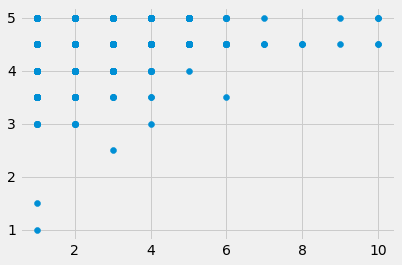

In [27]:
plt.scatter(x=data['bedrooms'],y=data['overall_satisfaction'])

In [28]:
#relationship between bedrooms and  average price

In [29]:
df2=pd.pivot_table(data,index='bedrooms',values='price',aggfunc='mean')
df2

,price
bedrooms,
1.0,135.482929
2.0,203.321589
3.0,255.014543
4.0,302.268499
5.0,451.677419
6.0,503.000000
7.0,914.500000
8.0,467.666667
9.0,689.500000


In [30]:
dd=data['price']>500
data[dd]

,room_id,host_id,room_type,city,neighborhood,reviews,overall_satisfaction,bedrooms,price,name,last_modified,latitude,longitude,location
33,10201214,8497487,Entire home/apt,Amsterdam,Ijburg / Eiland Zeeburg,19,5.0,4.0,763.0,Beautiful Watervilla in Amsterdam,2017-07-23 13:02:10.468528,52.348254,5.001477,0101000020E6100000E7C8CA2F83011440C0594A96932C...
35,5372074,14390964,Entire home/apt,Amsterdam,Centrum West,10,5.0,3.0,721.0,Prinsengracht Appartement,2017-07-23 12:52:40.980471,52.373078,4.884269,0101000020E61000006C770FD07D891340B56D1805C12F...
36,10511291,5421078,Entire home/apt,Amsterdam,Watergraafsmeer,1,4.5,3.0,1412.0,Whole house 200m2 Frankendael Park,2017-07-23 12:30:42.249974,52.350968,4.929821,0101000020E61000003B8908FF22B81340A5F8F884EC2C...
37,18047871,9302267,Entire home/apt,Amsterdam,Centrum West,0,4.5,4.0,541.0,Great 4 bedroom apartment at the flower market,2017-07-23 12:30:27.637777,52.367890,4.889273,0101000020E6100000FDDCD0949D8E13404243FF04172F...
38,7468232,7215538,Entire home/apt,Amsterdam,Noord-West / Noord-Midden,2,4.5,2.0,594.0,MuseumSquare apartment with garden,2017-07-23 12:30:27.627216,52.355169,4.883219,0101000020E6100000C4D2C08F6A881340C9C6832D762D...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,17837895,122004515,Entire home/apt,Amsterdam,Centrum West,1,4.5,2.0,504.0,White penthouse apartment at canals in City Ce...,2017-07-23 05:54:16.656551,52.372990,4.884113,0101000020E6100000B1DF13EB5489134016DEE522BE2F...
1102,13087840,12902359,Entire home/apt,Amsterdam,Centrum West,7,5.0,2.0,510.0,Newly available! Houseboat in Central Amsterdam,2017-07-23 05:58:20.348671,52.376971,4.885790,0101000020E6100000D07EA4880C8B13402C45F2954030...
1148,11748538,1790158,Entire home/apt,Amsterdam,Centrum West,5,5.0,2.0,510.0,Amazing on the canals and 9 streets,2017-07-23 05:53:57.759741,52.368013,4.883297,0101000020E6100000A19E3E027F8813405DC0CB0C1B2F...
1186,8269677,2674028,Entire home/apt,Amsterdam,Oud Noord,99,4.5,3.0,510.0,Big warehouse: industrial apartment in Amsterdam,2017-07-23 05:53:50.851610,52.394316,4.910463,0101000020E610000048DFA46950A4134010255AF27832...


In [31]:
#mean  price of each bedroom bedroom

array([<AxesSubplot:title={'center':'price'}, xlabel='bedrooms'>],
      dtype=object)

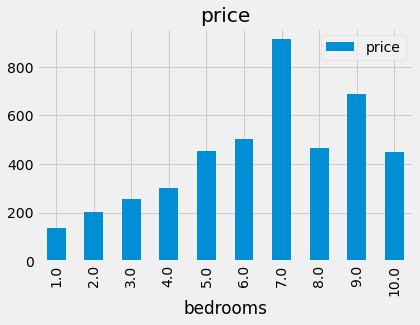

In [32]:
df2.plot(kind='bar',subplots=True)

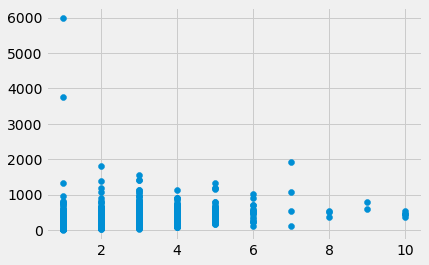

In [33]:
plt.scatter(x=data['bedrooms'],y=data['price'])

In [34]:
#removing price outliers

In [35]:
ff=data[data['price']>=3000].index
data.drop(ff,inplace=True)


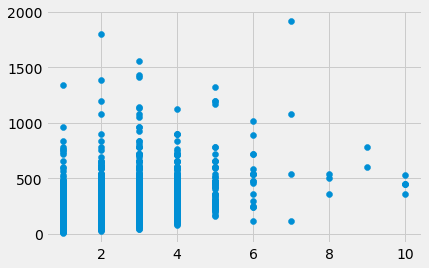

In [36]:
plt.scatter(data['bedrooms'],data['price'])

In [37]:
#houses withe price range of 150-200

In [38]:
fii3=data[(data.price>=150) & (data.price<=200)]

In [39]:
fii3['overall_satisfaction'].value_counts()

4.5    2323
5.0    1817
4.0     108
3.5      14
3.0       4
Name: overall_satisfaction, dtype: int64

In [40]:
#distribution of total bedrooms by percentage

In [41]:
df5=data['bedrooms'].value_counts()
df5

1.0     11099
2.0      4456
3.0      1444
4.0       473
5.0        62
6.0        19
10.0        5
7.0         4
8.0         3
9.0         2
Name: bedrooms, dtype: int64

In [42]:
bed_total=data['bedrooms'].sum()

In [43]:
def prop(df):
    return (df*100)/bed_total

df6=df5.apply(prop)

In [44]:
df6

1.0     41.446656
2.0     16.639904
3.0      5.392285
4.0      1.766309
5.0      0.231525
6.0      0.070951
10.0     0.018671
7.0      0.014937
8.0      0.011203
9.0      0.007469
Name: bedrooms, dtype: float64

array([<AxesSubplot:title={'center':'bedrooms'}>], dtype=object)

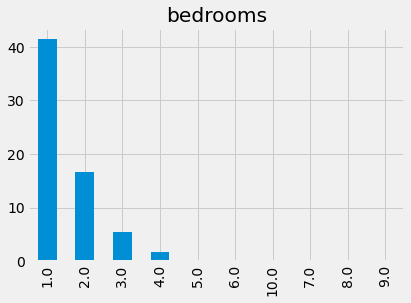

In [45]:
df6.plot(kind='bar',subplots=True)

In [46]:
data2=data.drop(['room_id','host_id'],axis=1,inplace=True)

In [47]:
#number of houses per neighborhoo

In [48]:
data['neighborhood'].value_counts()

De Baarsjes / Oud West                    3160
De Pijp / Rivierenbuurt                   2235
Centrum West                              1976
Centrum Oost                              1592
Noord-West / Noord-Midden                 1385
Westerpark                                1355
Oud Oost                                  1126
Bos en Lommer                              926
Oostelijk Havengebied / Indische Buurt     875
Oud Noord                                  458
Watergraafsmeer                            432
Ijburg / Eiland Zeeburg                    357
Slotervaart                                331
Buitenveldert / Zuidas                     241
Noord West                                 233
Noord Oost                                 214
Geuzenveld / Slotermeer                    183
Osdorp                                     156
De Aker / Nieuw Sloten                     104
Bijlmer Oost                                91
Bijlmer Centrum                             85
Gaasperdam / 

In [49]:
#average bedroom prices by neighborhood

In [50]:
neighborhood_d=pd.pivot_table(data,index='neighborhood',columns='bedrooms',values='price')
neighborhood_d

bedrooms,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
neighborhood,,,,,,,,,,
Bijlmer Centrum,79.746269,144.111111,104.200000,148.000000,342.000000,NaN,NaN,NaN,NaN,NaN
Bijlmer Oost,76.532258,139.315789,178.500000,244.500000,NaN,NaN,NaN,NaN,NaN,NaN
Bos en Lommer,113.696343,158.182540,199.631579,193.714286,NaN,NaN,NaN,NaN,NaN,NaN
Buitenveldert / Zuidas,110.315385,170.940299,211.379310,235.636364,374.000000,NaN,NaN,NaN,NaN,NaN
Centrum Oost,163.317365,244.828306,327.190083,386.218750,502.250000,NaN,NaN,NaN,599.0,359.0
Centrum West,169.510749,272.525974,380.705357,460.400000,611.750000,579.666667,1499.5,NaN,NaN,NaN
De Aker / Nieuw Sloten,90.475410,194.130435,241.454545,213.285714,240.000000,250.000000,NaN,NaN,NaN,NaN
De Baarsjes / Oud West,131.855251,198.633838,264.883838,297.660000,442.500000,539.500000,NaN,NaN,NaN,NaN
De Pijp / Rivierenbuurt,140.713398,210.458685,258.423841,334.475000,307.666667,NaN,NaN,NaN,NaN,NaN


In [51]:
#checking for any possible correlation in thhe data

<AxesSubplot:>

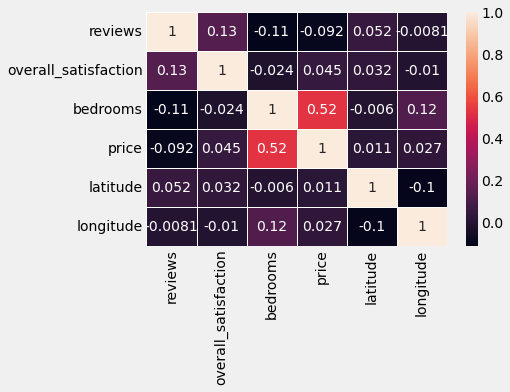

In [52]:
corr_matrix=data.corr()
sns.heatmap(corr_matrix,annot=True,linewidth=.8)


In [53]:
#preparing the data for modelling 

In [54]:
data.drop(['reviews','name','last_modified','latitude','longitude','location','city'],axis=1,inplace=True)
data

,room_type,neighborhood,overall_satisfaction,bedrooms,price
0,Shared room,De Pijp / Rivierenbuurt,4.5,1.0,156.0
1,Shared room,Centrum West,4.5,1.0,126.0
2,Shared room,Watergraafsmeer,4.5,1.0,132.0
3,Shared room,Centrum West,5.0,1.0,121.0
4,Shared room,De Baarsjes / Oud West,4.5,1.0,93.0
...,...,...,...,...,...
18718,Private room,Bijlmer Centrum,5.0,1.0,32.0
18719,Private room,Bijlmer Centrum,5.0,1.0,24.0
18720,Private room,Geuzenveld / Slotermeer,4.5,1.0,38.0
18721,Private room,Centrum West,4.5,1.0,36.0


In [55]:
#getting dummy variables for some of the columns

In [84]:
new_data=pd.get_dummies(data,columns=['neighborhood','room_type'],drop_first=True)

In [85]:
new_data

,overall_satisfaction,bedrooms,price,neighborhood_Bijlmer Oost,neighborhood_Bos en Lommer,neighborhood_Buitenveldert / Zuidas,neighborhood_Centrum Oost,neighborhood_Centrum West,neighborhood_De Aker / Nieuw Sloten,neighborhood_De Baarsjes / Oud West,...,neighborhood_Oostelijk Havengebied / Indische Buurt,neighborhood_Osdorp,neighborhood_Oud Noord,neighborhood_Oud Oost,neighborhood_Slotervaart,neighborhood_Watergraafsmeer,neighborhood_Westerpark,neighborhood_Westpoort,room_type_Private room,room_type_Shared room
0,4.5,1.0,156.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,4.5,1.0,126.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,4.5,1.0,132.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,5.0,1.0,121.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4.5,1.0,93.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18718,5.0,1.0,32.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
18719,5.0,1.0,24.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
18720,4.5,1.0,38.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
18721,4.5,1.0,36.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [86]:
x=new_data.drop(['price',],axis='columns')
x.head()               

,overall_satisfaction,bedrooms,neighborhood_Bijlmer Oost,neighborhood_Bos en Lommer,neighborhood_Buitenveldert / Zuidas,neighborhood_Centrum Oost,neighborhood_Centrum West,neighborhood_De Aker / Nieuw Sloten,neighborhood_De Baarsjes / Oud West,neighborhood_De Pijp / Rivierenbuurt,...,neighborhood_Oostelijk Havengebied / Indische Buurt,neighborhood_Osdorp,neighborhood_Oud Noord,neighborhood_Oud Oost,neighborhood_Slotervaart,neighborhood_Watergraafsmeer,neighborhood_Westerpark,neighborhood_Westpoort,room_type_Private room,room_type_Shared room
0,4.5,1.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,4.5,1.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,4.5,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,5.0,1.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4.5,1.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [87]:
y=new_data.price
y.head()

0    156.0
1    126.0
2    132.0
3    121.0
4     93.0
Name: price, dtype: float64

In [88]:
#importing the needed ML models and libraries

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [90]:
#training and fitting the model

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)
model=LinearRegression()
model.fit(x_train,y_train)

In [92]:
#evaluating the model

In [93]:
model.score(x_test,y_test)

0.4026657680541179

In [94]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.36818053, 0.36326249, 0.39144884, 0.38324543, 0.402818  ])

In [ ]:
#predicting the values

In [95]:
y_predicted=model.predict(x_test)
print(y_predicted)

[208.07016321 264.10041925 120.96495516 ... 106.66990438 215.07058408
 190.14358983]
